<a href="https://colab.research.google.com/github/mos9z/1lab/blob/main/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas
!pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [56]:
df = pd.read_csv("/content/drive/MyDrive/anime.csv")# чтение файла
df
#y - type; x - members

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
df["type"].describe(include="all")

count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

In [25]:

mean = df.groupby(['type'])['rating'].mean()

mean


type
Movie      6.318058
Music      5.588996
ONA        5.643298
OVA        6.375221
Special    6.523501
TV         6.902299
Name: rating, dtype: float64

In [24]:

median = df.groupby(['type'])['rating'].median()
median

type
Movie      6.470
Music      5.625
ONA        5.755
OVA        6.380
Special    6.630
TV         6.940
Name: rating, dtype: float64

In [23]:
mode = df.groupby('type')['rating'].agg(pd.Series.mode)
mode

type
Movie               6.0
Music      [5.79, 6.06]
ONA                 5.0
OVA                 6.0
Special            6.71
TV                  6.5
Name: rating, dtype: object

In [21]:
min = df.groupby(['type'])['rating'].min()
min

type
Movie      1.92
Music      3.28
ONA        2.58
OVA        2.00
Special    1.67
TV         2.67
Name: rating, dtype: float64

In [22]:
max = df.groupby(['type'])['rating'].max()
max

type
Movie      10.00
Music       8.38
ONA         8.26
OVA         9.25
Special     8.66
TV          9.60
Name: rating, dtype: float64

In [20]:
std = df.groupby(['type'])['rating'].std()
std

type
Movie      1.211988
Music      0.958440
ONA        1.127091
OVA        0.858358
Special    0.887762
TV         0.863526
Name: rating, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [30]:
q1 = df.groupby(['type'])['rating'].quantile(0.25) # (25% квантиль) ваш код здесь
q1

type
Movie      5.420
Music      5.010
ONA        4.870
OVA        5.850
Special    6.085
TV         6.440
Name: rating, dtype: float64

In [29]:
q2 = df.groupby(['type'])['rating'].quantile(0.5) # (50% квантиль) ваш код здесь
q2

type
Movie      6.470
Music      5.625
ONA        5.755
OVA        6.380
Special    6.630
TV         6.940
Name: rating, dtype: float64

In [28]:
q3 = df.groupby(['type'])['rating'].quantile(0.75) # (75% квантиль) ваш код здесь
q3

type
Movie      7.2500
Music      6.1525
ONA        6.4125
OVA        6.9200
Special    7.1100
TV         7.4600
Name: rating, dtype: float64

In [31]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

type
Movie      1.8300
Music      1.1425
ONA        1.5425
OVA        1.0700
Special    1.0250
TV         1.0200
Name: rating, dtype: float64

Какие выводы можно сделать исходя из полученных статистических данных?

Исходя из всех выполненных выше вычислений, (max, min и median) можно наблюдать, что тип аниме варьируется в популярности и (количестве членов сообщества) от рейтинга. Минимальный рейтинг у типа аниме Special, а максимальный у  Movie.

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<ipython-input-62-136ec71fe1ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].round(1) #округление
<ipython-input-62-136ec71fe1ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(int) #перевод из float в int


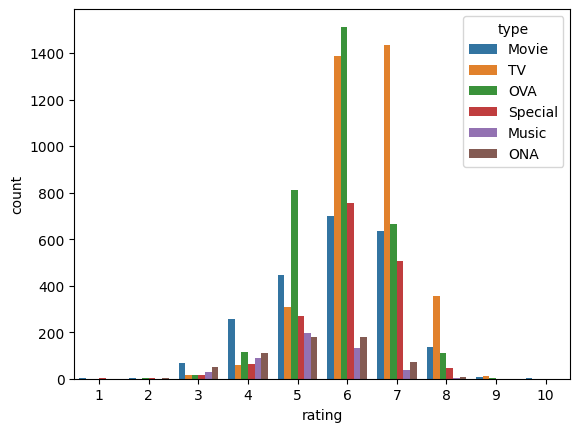

In [62]:
df.dropna(inplace=True)
df = df.loc[df['episodes'] != 'Unknown']
df['rating'] = df['rating'].round(1) #округление
df['rating'] = df['rating'].astype(int) #перевод из float в int
sns.countplot(x='rating', hue='type', data=df);


 Вывод: По Гистограмме можно увидеть, что чаще всего оценки ставят OVA (>1400), на втором месте TV (>1400)


Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

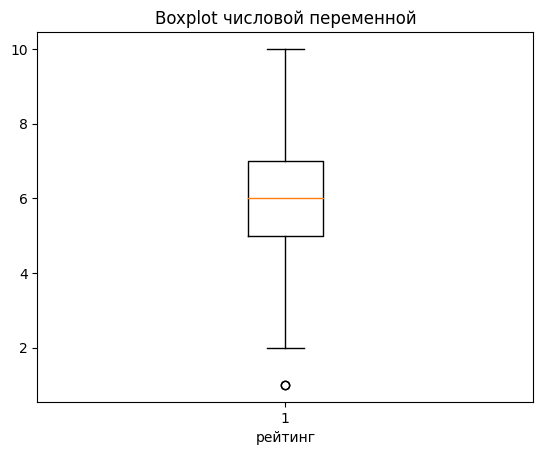

In [63]:

plt.boxplot(df['rating'])
plt.title('Boxplot числовой переменной')
plt.xlabel('рейтинг')
plt.show()

Вывод: Можно сделать вывод, что у какого-то аниме из датасета рейтинг 1 и по графику можно сказать, что это выброс

<Axes: xlabel='rating', ylabel='type'>

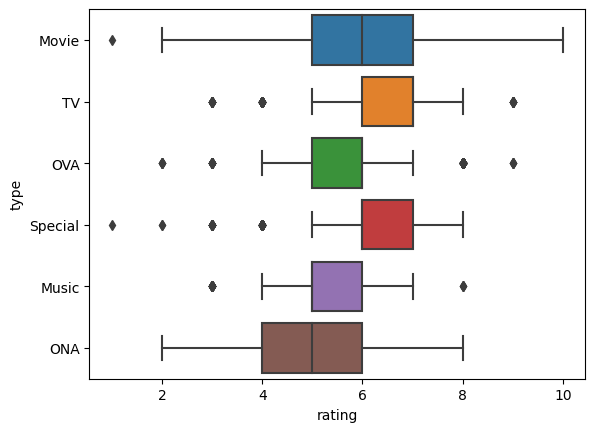

In [64]:
sns.boxplot(x='rating', y='type',data=df)

Вывод:На данном боксплоте можно наблюдать, что на графе присутствют выбросы во всех типах кроме ONA

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

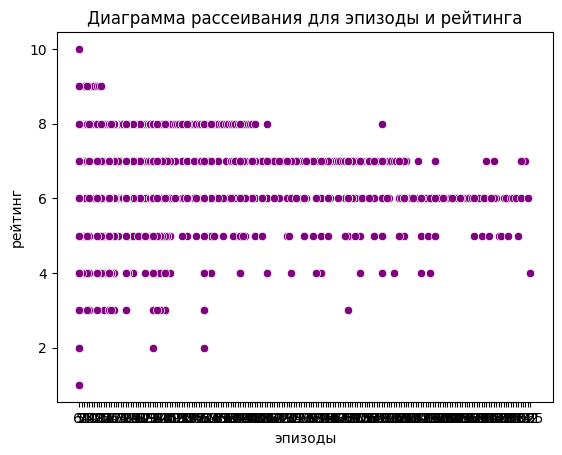

In [65]:
# Пример диаграммы рассеивания для возраста и роста
sns.scatterplot(x=df['episodes'], y=df['rating'], color='purple')
plt.title('Диаграмма рассеивания для эпизоды и рейтинга')
plt.xlabel('эпизоды')
plt.ylabel('рейтинг')
plt.show()


Вывод: Видно что аниме у которых не там много серий рейтинг более высокий относительно тех, которые имеют большее количество серий со спадом рейтинга соответственно.



Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

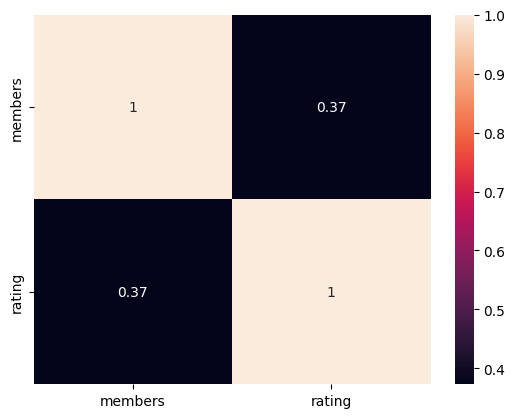

In [50]:
grouped_data = df[["members","rating"]]

corr_matrix = grouped_data.corr()

sns.heatmap(corr_matrix, annot=True)

Вывод: Поскольку значение корреляции между признаками members и rating равна 0.37, можно сделать вывод, что если увеличивается один из параметров, то, однозначно, увеличивается и второй.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")